In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
ts = {'y': [10,14,8,25,16,22,14,35,15,27,18,40,28,40,25,65],
      'qtr': ['2010-03-01','2010-06-01','2010-09-01','2010-12-01'
           ,'2011-03-01','2011-06-01','2011-09-01','2011-12-01'
           ,'2012-03-01','2012-06-01','2012-09-01','2012-12-01'
           ,'2013-03-01','2013-06-01','2013-09-01','2013-12-01']}

In [25]:
ts['qtr'] = pd.to_datetime(ts['qtr'])
ts1       = pd.DataFrame(ts)
ts_df     = ts1.set_index('qtr')

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [32]:
fit = ExponentialSmoothing(ts_df, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


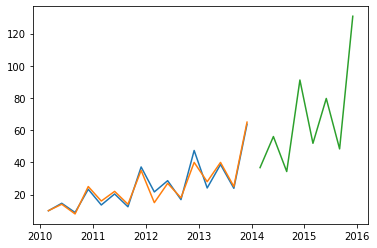

In [33]:
plt.plot(fit.fittedvalues)
plt.plot(ts_df)
plt.plot(fit.forecast(8))
plt.show()

In [29]:
print(fit.params_formatted)

                     name     param  optimized
smoothing_level     alpha  0.188445       True
smoothing_slope      beta  0.188445       True
smoothing_seasonal  gamma  0.285367       True
initial_level         l.0  2.464780       True
initial_slope         b.0  0.072895       True
initial_seasons.0     s.0 -0.367017       True
initial_seasons.1     s.1 -0.103873       True
initial_seasons.2     s.2 -0.607841       True
initial_seasons.3     s.3  0.184716       True


In [30]:
print(fit.forecast(8))

2014-03-01     36.746044
2014-06-01     56.056593
2014-09-01     34.322212
2014-12-01     91.161745
2015-03-01     51.860006
2015-06-01     79.709329
2015-09-01     48.381247
2015-12-01    130.779034
Freq: QS-DEC, dtype: float64


In [34]:
print('RMSE:', mean_squared_error(fit.fittedvalues, ts_df))

RMSE: 8.890600457323563
